In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist 
import pickle as pk
import seaborn as sn
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")

In [2]:
# Utility Functions 

def TrainTestSplit(Data,r):
  Y = 4
  L = Data[Y].unique()
  D = {}
  for i in range(len(L)):
    D[L[i]] = i
  for i in range(len(Data)):
    Data[Y].iloc[i] = D[Data[Y].iloc[i]]
  Testing = Data.sample(random_state=20 , n = int(r*len(Data)))
  Training = pd.concat([Data,Testing])
  Training = Training.drop_duplicates(keep=False) 
  Training = np.array(Training)
  Testing = np.array(Testing)
  Xtrain = Training[:,:4]
  Ytrain = Training[:,4]
  Xtest = Testing[:,:4]
  Ytest = Testing[:,4]  
  return Xtrain , Ytrain , Xtest, Ytest

In [3]:
#1.1.
path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_4/Dataset/iris.data'
data = pd.read_csv(path,header=None)

Xtrain , Ytrain , Xtest, Ytest  = TrainTestSplit(data,0.3)

In [4]:
print('Data shape :',data.shape)
print('Xtrain shape :',Xtrain.shape)
print('Ytrain shape :',Ytrain.shape)
print('Xtest shape :',Xtest.shape)
print('Ytest shape :',Ytest.shape)

Data shape : (150, 5)
Xtrain shape : (102, 4)
Ytrain shape : (102,)
Xtest shape : (45, 4)
Ytest shape : (45,)


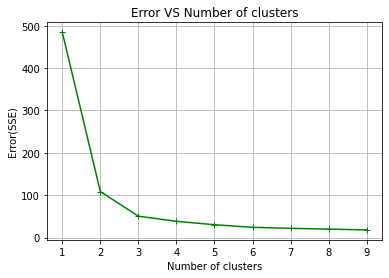


	Optimal Value of k from Elbow method : 3


In [5]:
#1.2.

def OptimalK(NCUL):
  SSE = []
  for n in NCUL: 
    km = KMeans(n_clusters=n, random_state=20)
    km.fit(Xtrain)
    SSE.append(km.inertia_)

  plt.title('Error VS Number of clusters')
  plt.xlabel('Number of clusters')
  plt.ylabel('Error(SSE)')
  plt.plot(NCUL,SSE,marker = '+',color = 'green')
  plt.grid()
  plt.show()
  # From the plot , the optimal value of k = 3
  optk = 3
  return optk

NCUL = [i for i in range(1,10)]
optk = OptimalK(NCUL)
print('\n\tOptimal Value of k from Elbow method :',optk)




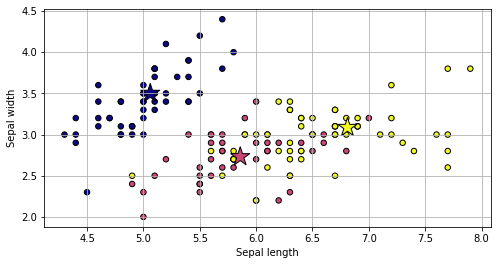

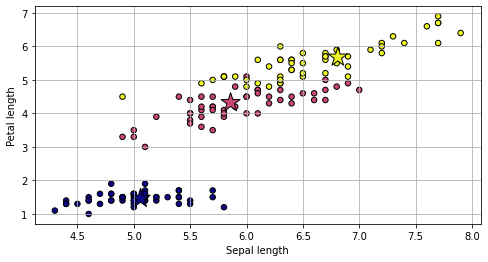

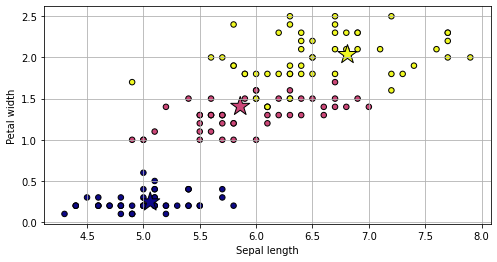

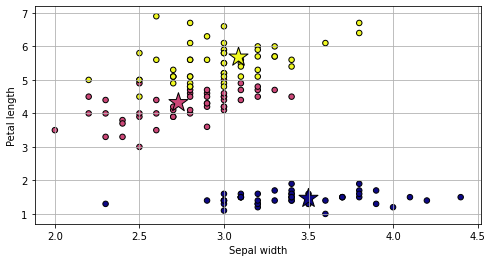

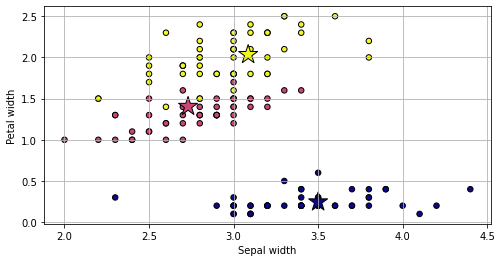

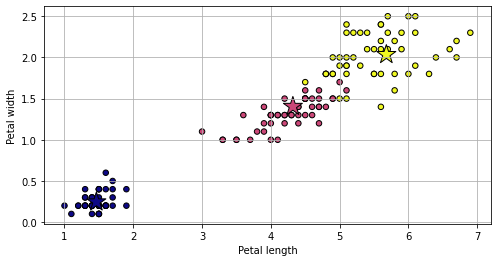

In [6]:
#1.3.

def plot(path):
  km =pk.load(open(path,'rb')) 
  center = km.cluster_centers_

  Attri = ['Sepal length' , 'Sepal width', 'Petal length' , 'Petal width']
  Data = np.array(data)
  for i in range(len(Attri)-1):
    for j in range(i+1,len(Attri)):
      plt.figure(figsize=(8,4))
      plt.scatter(Data[:, i], Data[:, j], c=Data[:,4],s=30, edgecolor='k', cmap= 'plasma')
      plt.scatter(center[:, i], center[:, j], c=np.array([0,1,2]), s=400 , edgecolor='k' , cmap='plasma',marker = '*')
      plt.xlabel(Attri[i])
      plt.ylabel(Attri[j])
      plt.grid()
      plt.show()

path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_4/Saved_Models/1/optk'
plot(path)

In [ ]:
#1.4.
# km = KMeans(n_clusters=optk, random_state=20)
# km.fit(Xtrain)
# Ytrainpred = km.predict(Xtrain)
# Ytestpred = km.predict(Xtest)
# print('Optimal Value of k from Elbow method :',optk)
# print('Training Accuracy : ',round(accuracy_score(list(Ytrain), list(Ytrainpred)),3)*100,'%')
# print('Validation Accuracy : ',round(accuracy_score(list(Ytest), list(Ytestpred)),3)*100,'%')

In [ ]:
# Saving Best Model
# path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_4/Saved_Models/1/optk'
# pk.dump(km, open(path, "wb"))

In [7]:
# Load the saved model

def getresults(path):
  km =pk.load(open(path,'rb')) 
  Ytrainpred = km.predict(Xtrain)
  Ytestpred = km.predict(Xtest)
  print('Optimal Value of k from Elbow method :',optk)
  print('Training Accuracy : ',round(accuracy_score(list(Ytrain), list(Ytrainpred)),3)*100,'%')
  print('Validation Accuracy : ',round(accuracy_score(list(Ytest), list(Ytestpred)),3)*100,'%')

path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_4/Saved_Models/1/optk'
getresults(path)

Optimal Value of k from Elbow method : 3
Training Accuracy :  91.2 %
Validation Accuracy :  88.9 %
